In [42]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from pandas.plotting import lag_plot

%matplotlib inline
sns.set_theme(color_codes=True)

df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)
df = df.drop('EwsProcedure', 1)
df.ObservationDate = pd.to_datetime(arg=df.ObservationDate,infer_datetime_format=True)

In [43]:
patient = 30
subdf = df[df['PatientId'] == patient]
subdf = subdf.reset_index(drop=True)

In [44]:
subdf.sort_values(by=['EWS_Total'])

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
7,30,2019-05-03 00:13:42,1,146.0,0.0,ALERT,0,100.0,0.0,False,0.0,94,1,15,0,36.2,0
41,30,2019-05-07 22:21:10,1,NaN,NaN,ALERT,0,96.0,0.0,False,0.0,78,0,18,0,36.8,0
43,30,2019-05-08 06:01:48,2,101.0,1.0,ALERT,0,95.0,1.0,False,0.0,80,0,16,0,36.6,0
6,30,2019-05-02 19:51:38,2,92.0,2.0,ALERT,0,100.0,0.0,False,0.0,74,0,18,0,36.4,0
11,30,2019-05-03 06:35:22,2,113.0,0.0,ALERT,0,98.0,0.0,True,2.0,76,0,20,0,36.3,0
0,30,2019-05-01 15:27:44,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
27,30,2019-05-05 05:46:31,3,93.0,2.0,ALERT,0,95.0,1.0,False,0.0,72,0,18,0,36.4,0
32,30,2019-05-05 19:47:50,3,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,96,1,18,0,36.6,0
23,30,2019-05-04 09:19:10,3,103.0,1.0,ALERT,0,95.0,1.0,False,0.0,94,1,17,0,36.2,0
33,30,2019-05-06 01:08:28,3,91.0,2.0,ALERT,0,94.0,1.0,False,0.0,88,0,20,0,36.5,0


#### Because it is not always possible to determine whether confusion is ‘new’, we recommended that any confusion in an acutely ill patient should always be considered to be ‘new’ until confirmed to be otherwise. Mindful of the clear evidence that new confusion is an indicator of potentially severe physiological disturbance and risk of clinical deterioration, we recommended that these patients are promptly evaluated to establish the cause and initiate treatment.

In [45]:
subdf.sort_values(by=['ObservationDate'])

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,30,2019-05-01 15:27:44,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
1,30,2019-05-02 01:57:16,6,89.0,3.0,ALERT,0,96.0,0.0,False,0.0,84,0,25,3,36.4,0
2,30,2019-05-02 03:19:01,7,87.0,3.0,ALERT,0,95.0,1.0,False,0.0,80,0,26,3,36.4,0
3,30,2019-05-02 05:16:49,3,92.0,2.0,ALERT,0,95.0,1.0,False,0.0,67,0,19,0,36.3,0
4,30,2019-05-02 08:26:44,5,73.0,3.0,ALERT,0,96.0,0.0,True,2.0,86,0,20,0,36.3,0
5,30,2019-05-02 12:53:26,4,97.0,2.0,ALERT,0,99.0,0.0,True,2.0,90,0,20,0,36.1,0
6,30,2019-05-02 19:51:38,2,92.0,2.0,ALERT,0,100.0,0.0,False,0.0,74,0,18,0,36.4,0
7,30,2019-05-03 00:13:42,1,146.0,0.0,ALERT,0,100.0,0.0,False,0.0,94,1,15,0,36.2,0
8,30,2019-05-03 00:27:55,3,85.0,3.0,ALERT,0,99.0,0.0,False,0.0,79,0,18,0,36.2,0
9,30,2019-05-03 02:55:12,4,93.0,2.0,ALERT,0,98.0,0.0,True,2.0,83,0,17,0,36.2,0


#### Patient30 has reached Stage III: Hyperinflammation phase. These patients often deteriorate suddenly, usually developing ARDS. Acute respiratory distress syndrome involves inflammation and fluid build-up in the lungs, which prevents oxygen transfer from the air to the blood.
#### SpO2, also known as oxygen saturation dropped and and temperature increases drastically.
#### Loc --> New Confusion

In [46]:
# print(subdf.HR.sort_values().unique()) #show unique values of column sorted

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


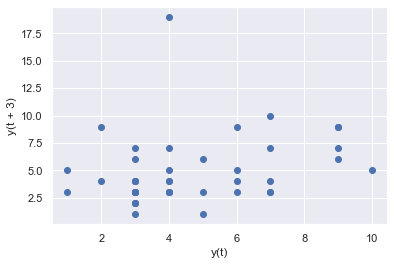

In [47]:
lag_plot(subdf.EWS_Total,lag=3)   #observation vs previous observation
plt.show()

In [48]:
series = subdf.EWS_Total
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.483222
t+1  0.483222  1.000000


#### Patients with SpO2 values of 90% or less were older and were more likely to be men, to have hypertension, and to present with dyspnea than those with SpO2 values greater than 90%. Overall, 36 patients (25.7%) died during hospitalization after median 14-day follow-up. Higher SpO2 levels after oxygen supplementation were associated with reduced mortality independently of age and sex (hazard ratio per 1-U SpO2, 0.93; 95% CI, 0.91 to 0.95; P<.001). The SpO2 cutoff value of 90.5% yielded 84.6% sensitivity and 97.2% specificity for prediction of survival. Dyspnea was also independently associated with death in multivariable analysis (hazard ratio, 2.60; 95% CI, 1.24 to 5.43; P1⁄4.01).
#### Conclusion: In this cohort of patients with COVID-19, hypoxemia was independently associated with in-hospital mortality. These results may help guide the clinical management of patients with severe COVID-19, particularly in settings requiring strategic allocation of limited critical care resources.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

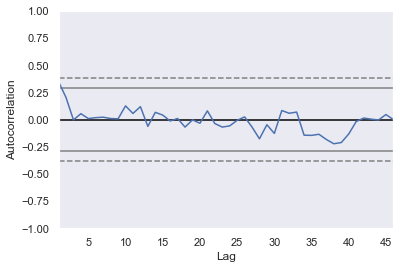

In [57]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(subdf.SpO2)

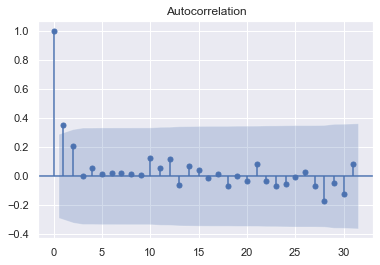

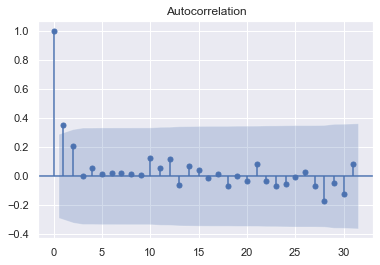

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(subdf.SpO2, lags=31)

Test MSE: 13.143


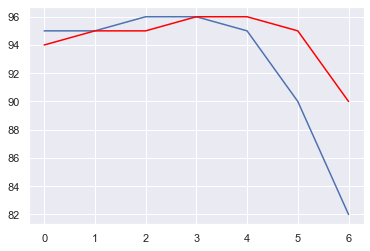

In [51]:
#The expected values for the next 7 measurements are plotted (blue) compared to the predictions from the model (red).

from sklearn.metrics import mean_squared_error
series = subdf.SpO2
# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

Coefficients: [ 7.58311016e+01  1.55150863e-02  2.65041861e-01 -2.00439471e-01
  9.25343877e-02  8.36841557e-02 -4.47631018e-02 -8.81285251e-02
 -4.65599773e-02  1.26894649e-01]
predicted=94.441878, expected=95.000000
predicted=95.075947, expected=95.000000
predicted=95.491938, expected=96.000000
predicted=95.023436, expected=96.000000
predicted=95.300397, expected=95.000000
predicted=95.022140, expected=90.000000
predicted=95.603820, expected=82.000000
Test RMSE: 5.502


/Users/emeraldin/opt/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


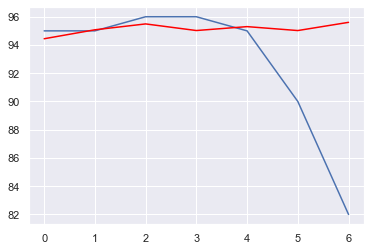

In [52]:
# Autoregression model, 7 measurement forecast

# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = subdf.SpO2.dropna()
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=9)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=3.483538, expected=3.000000
predicted=4.300549, expected=3.000000
predicted=4.348007, expected=1.000000
predicted=3.285978, expected=4.000000
predicted=3.970337, expected=2.000000
predicted=4.513485, expected=5.000000
predicted=4.249288, expected=19.000000
Test RMSE: 5.798


/Users/emeraldin/opt/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


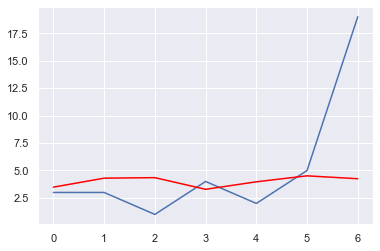

In [53]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = subdf.EWS_Total.dropna()
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
window = 9
model = AutoReg(train, lags=9)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [54]:
subdf.set_index('ObservationDate', inplace=True)

<AxesSubplot:xlabel='ObservationDate'>

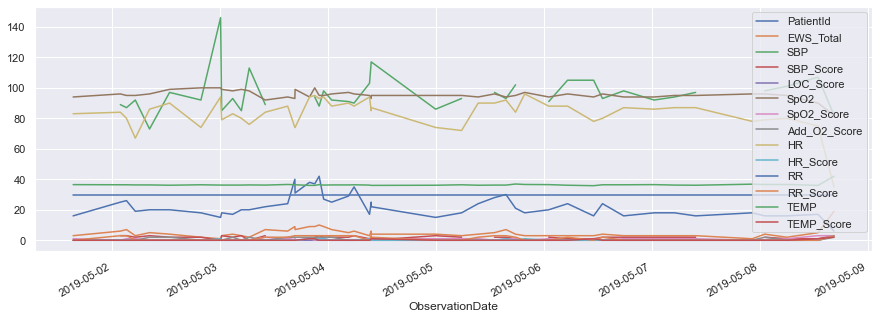

In [55]:
subdf.plot(figsize=(15,5))